# Singular Value Decomposition (Image Compression)

Decomposing input image matrix X as X=U S VT and approximate it to a rank-r approximation of X

This program can use images in the JPEG, PNG, TIFF, and GIF format.

In [1]:
# Importing the required libraries and funtions

from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from tkinter import *
from tkinter import filedialog
import cv2

In [3]:
# Getting the configuration from user using GUI

def Configure():
    
    filepath = filedialog.askopenfilename()
    global A
    A = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    
    #Setting the desired rank
    global r
    r =rank.get()

    window.destroy()

window = Tk()
window.title('Configuration')
window.geometry('300x300')

rank_label=StringVar()
rank_label.set("Enter your desired rank: ")
rank_label=Label(window, textvariable=rank_label, height=1)
rank_label.pack(pady=30)

rank=Entry(window,width=10)
rank.pack()

button = Button(text="Choose your file",height=10, width=20, bg='#9B00B3', fg='White',command=Configure)
button.pack(pady=50)
window.mainloop()

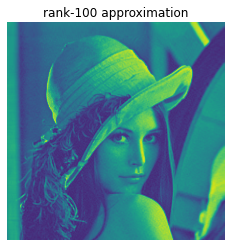

In [4]:
#Calculating SVD of the image

#Calculating the Economy SVD (Rank-r)
U, S, VT = np.linalg.svd(A,full_matrices=False)
r = int(r)

#Extracting diagnolan matrix from Singular Values matrix S
S = np.diag(S)

for i in range(r):
    #Constructing approximate image
    Aapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    img = plt.imshow(Aapprox)
    plt.axis('off')
    plt.title('rank-'+str(r)+' approximation')


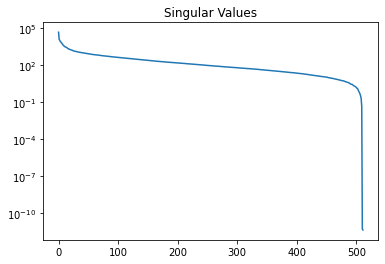

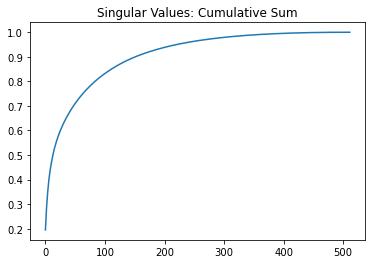

In [5]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title("Singular Values")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title("Singular Values: Cumulative Sum")
plt.show()